In [2]:
%matplotlib notebook

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt

In [4]:
housing_df = pd.read_csv("Resources/DC_Properties.csv")

/anaconda3/envs/PythonData/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
housing_df.head()

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [6]:
housing_df2 = housing_df.drop(["Unnamed: 0", "BLDG_NUM", "NATIONALGRID", "X", "Y"], axis=1)
housing_df2.head()

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,...,ZIPCODE,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,QUADRANT
0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,1972,...,20009.0,38.914680,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW
1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,1972,...,20009.0,38.914683,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW
2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,1984,...,20009.0,38.914684,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW
3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,1984,...,20009.0,38.914683,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW
4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,1985,...,20009.0,38.914383,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW


In [7]:
housing_df2['YEAR'] = pd.DatetimeIndex(housing_df2['SALEDATE']).year
housing_df2['MONTH'] = pd.DatetimeIndex(housing_df2['SALEDATE']).month
housing_df2.head()

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,QUADRANT,YEAR,MONTH
0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,1972,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW,2003.0,11.0
1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,1972,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW,2000.0,8.0
2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,1984,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW,2016.0,6.0
3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,1984,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW,2006.0,7.0
4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,1985,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW,NaN,NaN


In [8]:
housing_df2 = housing_df2[housing_df2.PRICE.notnull()]
residential_df = housing_df2.loc[housing_df2["SOURCE"] == "Residential"]
residential_df.count().head()

BATHRM       57900
HF_BATHRM    57900
HEAT         57900
AC           57900
NUM_UNITS    57900
dtype: int64

In [9]:
housing_df3 = residential_df[['YEAR','YR_RMDL','QUADRANT']]
housing_df3.head()

,YEAR,YR_RMDL,QUADRANT
0,2003.0,1988.0,NW
2,2016.0,2009.0,NW
3,2006.0,2003.0,NW
5,2010.0,NaN,NW
7,2011.0,2011.0,NW


In [10]:
housing_df3 = housing_df3[housing_df3.YR_RMDL.notnull()]
housing_df3 = housing_df3[housing_df3.QUADRANT.notnull()]
housing_df3 = housing_df3[~(housing_df3['YR_RMDL'] < 1992.0)] 
housing_df3 = housing_df3[~(housing_df3['YR_RMDL'] > 2017.0)]
housing_df3.head(10)

,YEAR,YR_RMDL,QUADRANT
2,2016.0,2009.0,NW
3,2006.0,2003.0,NW
7,2011.0,2011.0,NW
8,2018.0,2008.0,NW
14,2011.0,2000.0,NW
16,2010.0,2006.0,NW
19,2001.0,2013.0,NW
20,2016.0,2009.0,NW
22,2006.0,2010.0,NW
23,2012.0,2010.0,NW


In [11]:
remodel_NW = housing_df3[housing_df3['QUADRANT'] == 'NW']
remodel_NW_df = remodel_NW.groupby('YR_RMDL')['QUADRANT'].count()
remodel_NW_df_pd = pd.DataFrame(data = remodel_NW_df)
remodel_NW_df_pd = remodel_NW_df_pd.rename(columns={'QUADRANT': 'NW'})
remodel_NW_df_pd

,NW
YR_RMDL,
1992.0,217
1993.0,59
1994.0,88
1995.0,149
1996.0,123
1997.0,64
1998.0,135
1999.0,150
2000.0,458


In [12]:
remodel_NE = housing_df3[housing_df3['QUADRANT'] == 'NE']
remodel_NE_df = remodel_NE.groupby('YR_RMDL')['QUADRANT'].count()
remodel_NE_df_pd = pd.DataFrame(data = remodel_NE_df)
remodel_NE_df_pd = remodel_NE_df_pd.rename(columns={'QUADRANT': 'NE'})
remodel_NE_df_pd

,NE
YR_RMDL,
1992.0,102
1993.0,14
1994.0,39
1995.0,39
1996.0,38
1997.0,17
1998.0,53
1999.0,38
2000.0,163


In [13]:
remodel_SE = housing_df3[housing_df3['QUADRANT'] == 'SE']
remodel_SE_df = remodel_SE.groupby('YR_RMDL')['QUADRANT'].count()
remodel_SE_df_pd = pd.DataFrame(data = remodel_SE_df)
remodel_SE_df_pd = remodel_SE_df_pd.rename(columns={'QUADRANT': 'SE'})
remodel_SE_df_pd

,SE
YR_RMDL,
1992.0,67
1993.0,10
1994.0,17
1995.0,39
1996.0,19
1997.0,8
1998.0,45
1999.0,23
2000.0,127


In [14]:
remodel_SW = housing_df3[housing_df3['QUADRANT'] == 'SW']
remodel_SW_df = remodel_SW.groupby('YR_RMDL')['QUADRANT'].count()
remodel_SW_df_pd = pd.DataFrame(data = remodel_SW_df)
remodel_SW_df_pd = remodel_SW_df_pd.rename(columns={'QUADRANT': 'SW'})
remodel_SW_df_pd

,SW
YR_RMDL,
1992.0,6
1993.0,1
1995.0,1
1998.0,2
1999.0,3
2000.0,8
2001.0,5
2002.0,7
2003.0,5


In [15]:
remodel_merge_1 = remodel_NW_df_pd.join(remodel_NE_df_pd,how='inner')
remodel_merge_2 = remodel_merge_1.join(remodel_SE_df_pd,how='inner')
remodel_merge_df = remodel_merge_2.join(remodel_SW_df_pd,how='inner')

remodel_merge_df

,NW,NE,SE,SW
YR_RMDL,,,,
1992.0,217,102,67,6
1993.0,59,14,10,1
1995.0,149,39,39,1
1998.0,135,53,45,2
1999.0,150,38,23,3
2000.0,458,163,127,8
2001.0,450,130,90,5
2002.0,526,229,125,7
2003.0,677,402,179,5


<IPython.core.display.Javascript object>


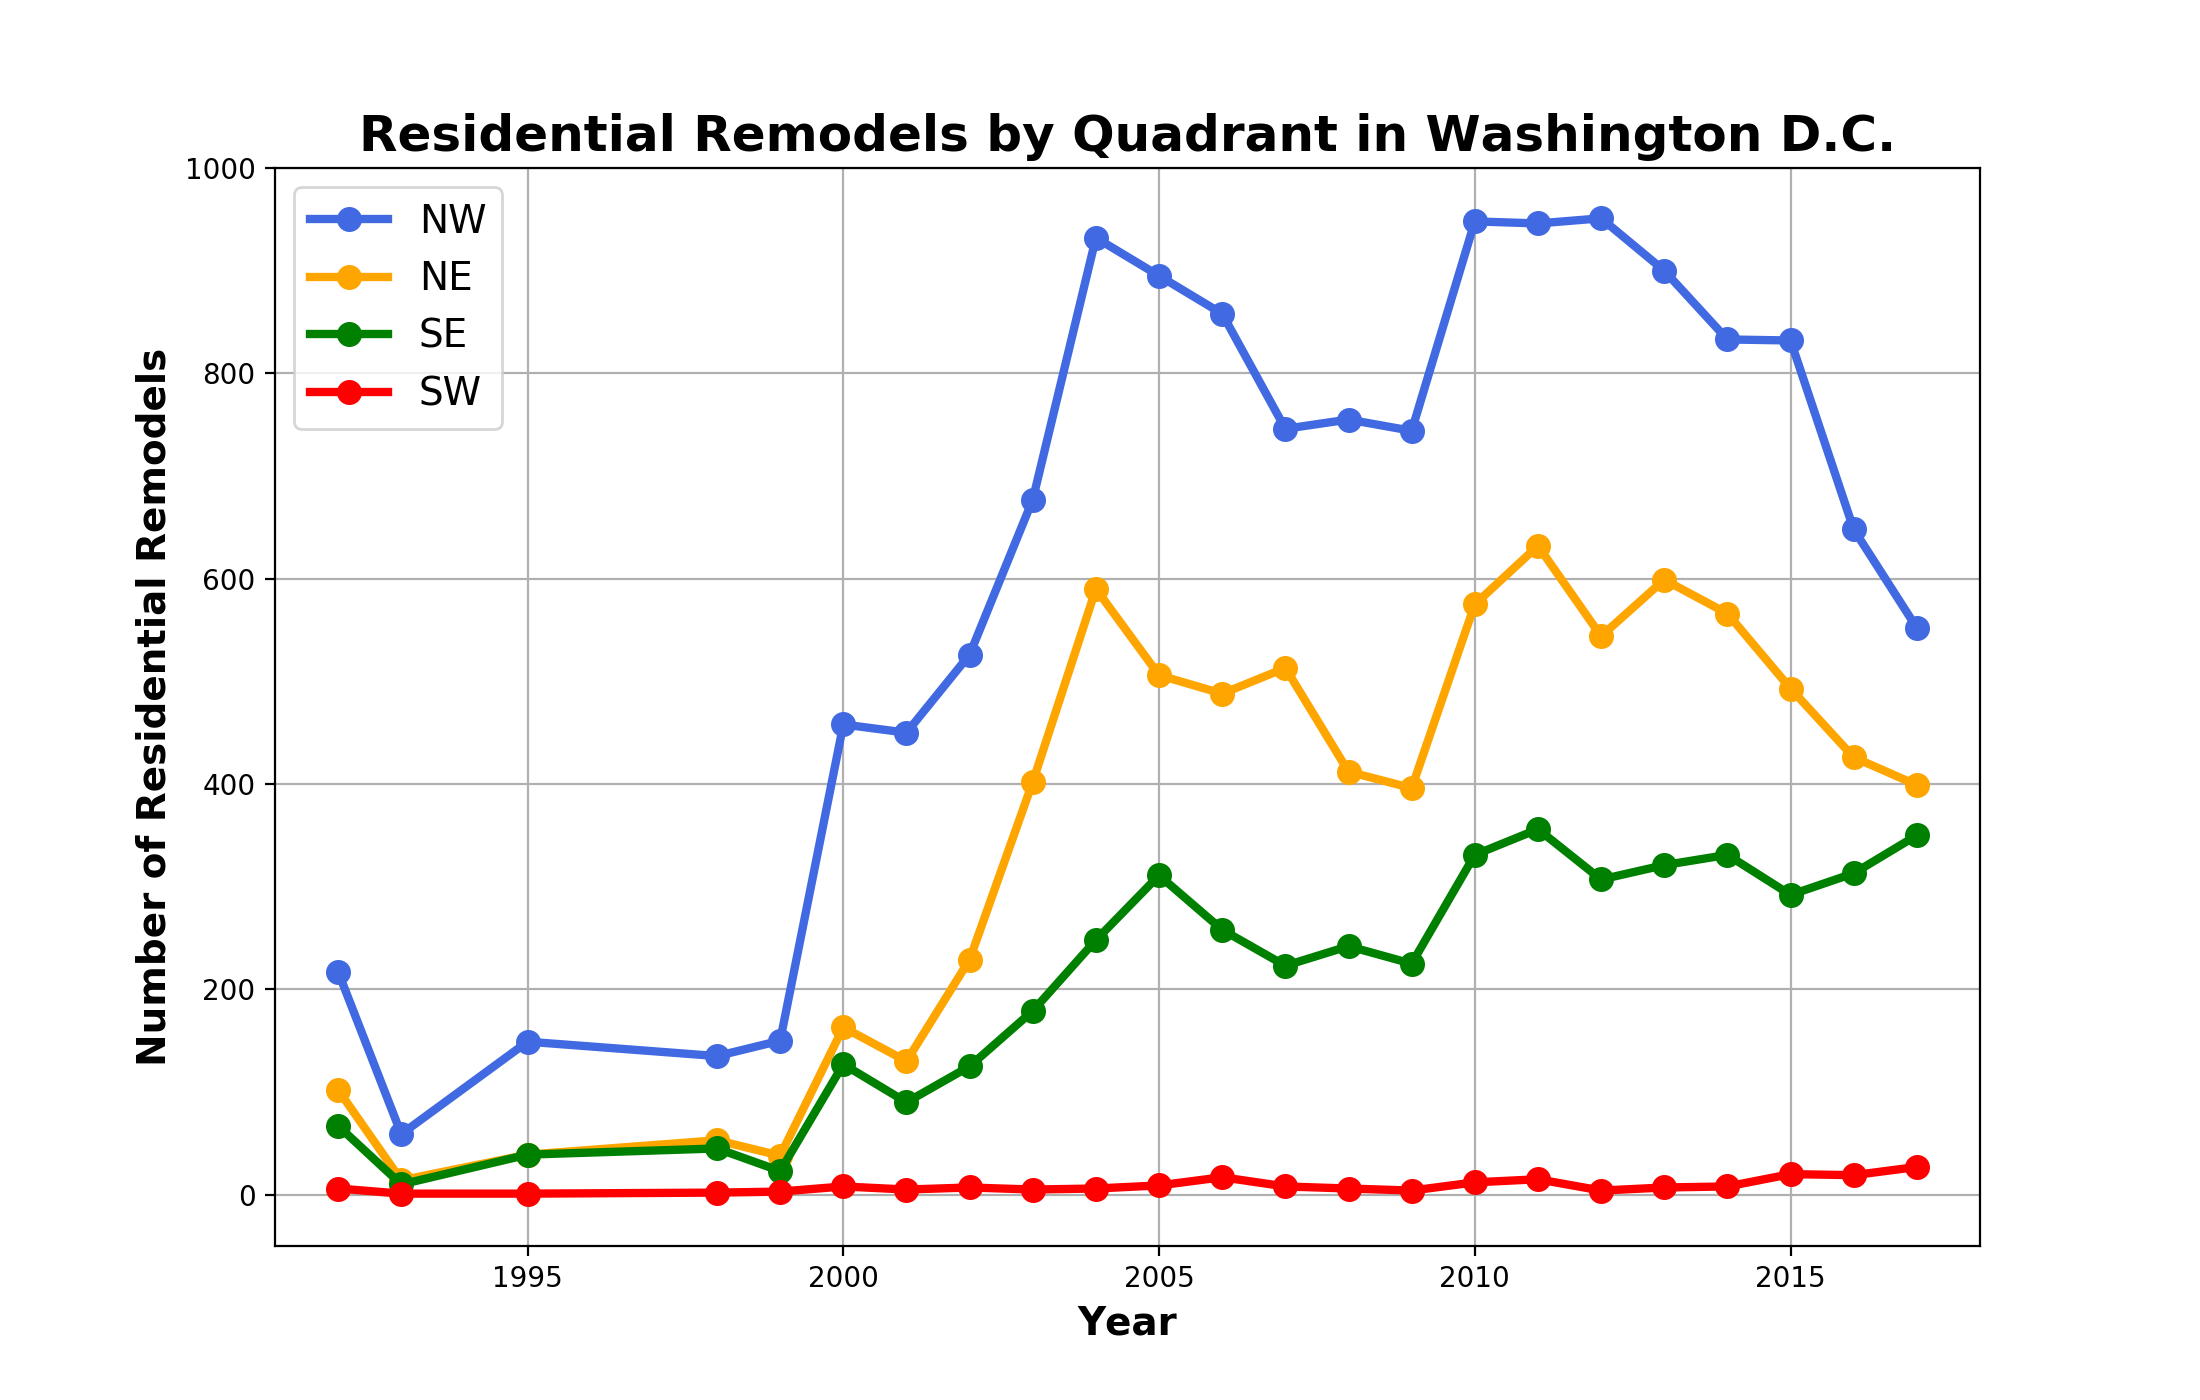

In [20]:
colors = ["royalblue", "orange", "green", "red"]
remodel_merge_df.plot(xlim=(1991,2018), figsize=(11,7), colors = colors, linewidth=3, marker="o", markersize=8)
plt.title("Residential Remodels by Quadrant in Washington D.C.", fontsize=18, fontweight='bold')
plt.ylabel("Number of Residential Remodels", fontsize=14, fontweight='bold')
plt.xlabel("Year", fontsize=14, fontweight='bold')
plt.grid()
plt.ylim(-50,1000)
plt.legend(fontsize=14)
plt.savefig("NewImages/Remodels_in_DC_quadrant.png")